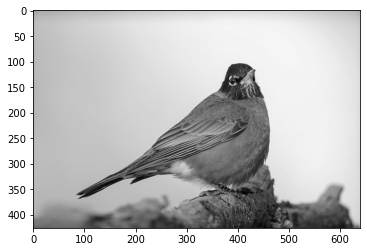

In [1]:
#Contour is a curve joining all the continuous points (along the boundary), having same color or intensity. 
#The contours are a useful tool for shape analysis and object detection and recognition.
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import cv2 as cv
from ShowImg import showImg

#For better accuracy, use binary images. So before finding contours, we should apply threshold or canny edge detection.
#In OpenCV, finding contours is like finding white object from black background. 
# ==> Use threshold to change foreground objects to white, background to black
#Load image
img = cv.imread('bird.jpg')
b, g, r = cv.split(img)
rgb = cv.merge([r, g, b])
img_copy = cv.imread('tom.png',0)
#If image is not a grayscale image, convert it to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.imshow(img_gray,'gray')
plt.show()


<Figure size 720x720 with 0 Axes>

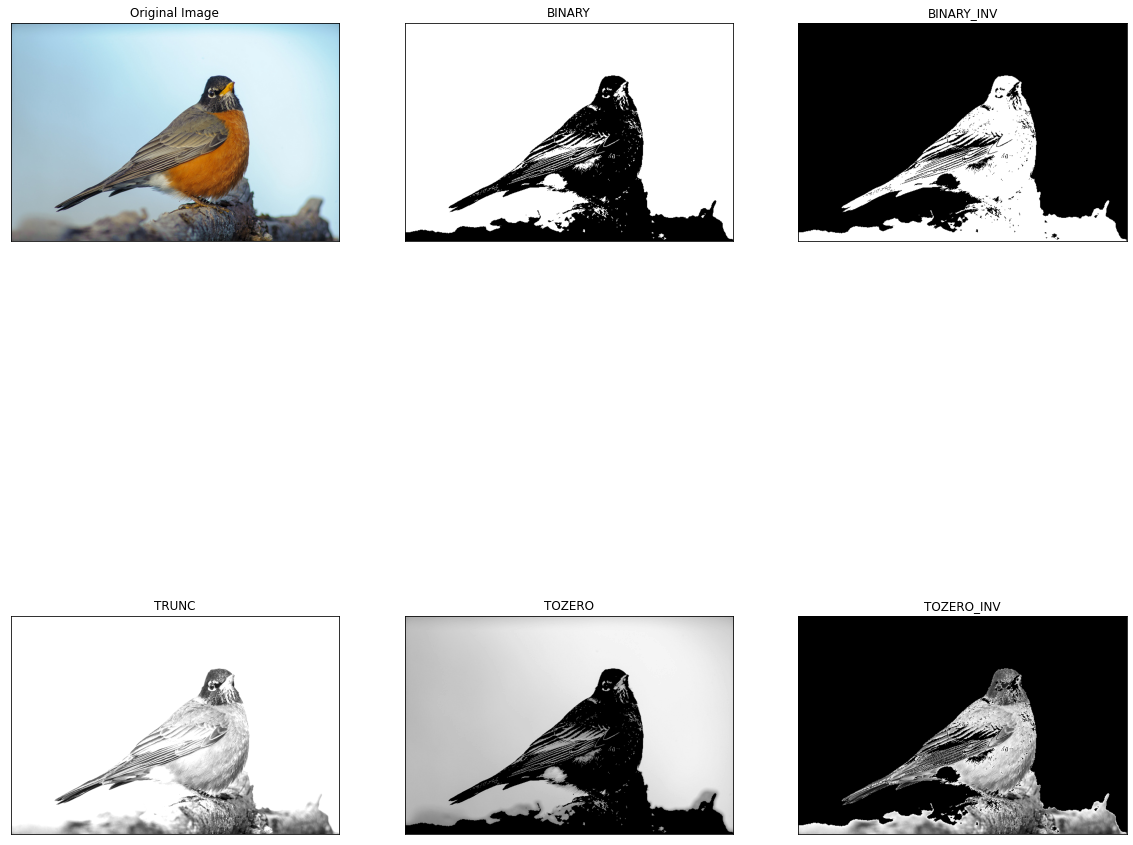

In [2]:
#Apply threshold
#Test threshold
ret,thresh1 = cv.threshold(img_gray,127,255,cv.THRESH_BINARY)        #if src(x,y) > thres = maxval else = 0
ret,thresh2 = cv.threshold(img_gray,127,255,cv.THRESH_BINARY_INV)    #if src(x,y) > thres = 0 else = maxval
ret,thresh3 = cv.threshold(img_gray,127,255,cv.THRESH_TRUNC)         #if src(x,y) > thres = thres else = src(x,y)
ret,thresh4 = cv.threshold(img_gray,127,255,cv.THRESH_TOZERO)        #if src(x,y) > thres = src(x,y) else = 0
ret,thresh5 = cv.threshold(img_gray,127,255,cv.THRESH_TOZERO_INV)    #if src(x,y) > thres = 0 else = src(x,y)

plt.figure(figsize=(10,10))

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [rgb, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(20,20))
for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()
#As a result, we can see in this image that TOZERO_INV yields the best result
# => use thresh 5

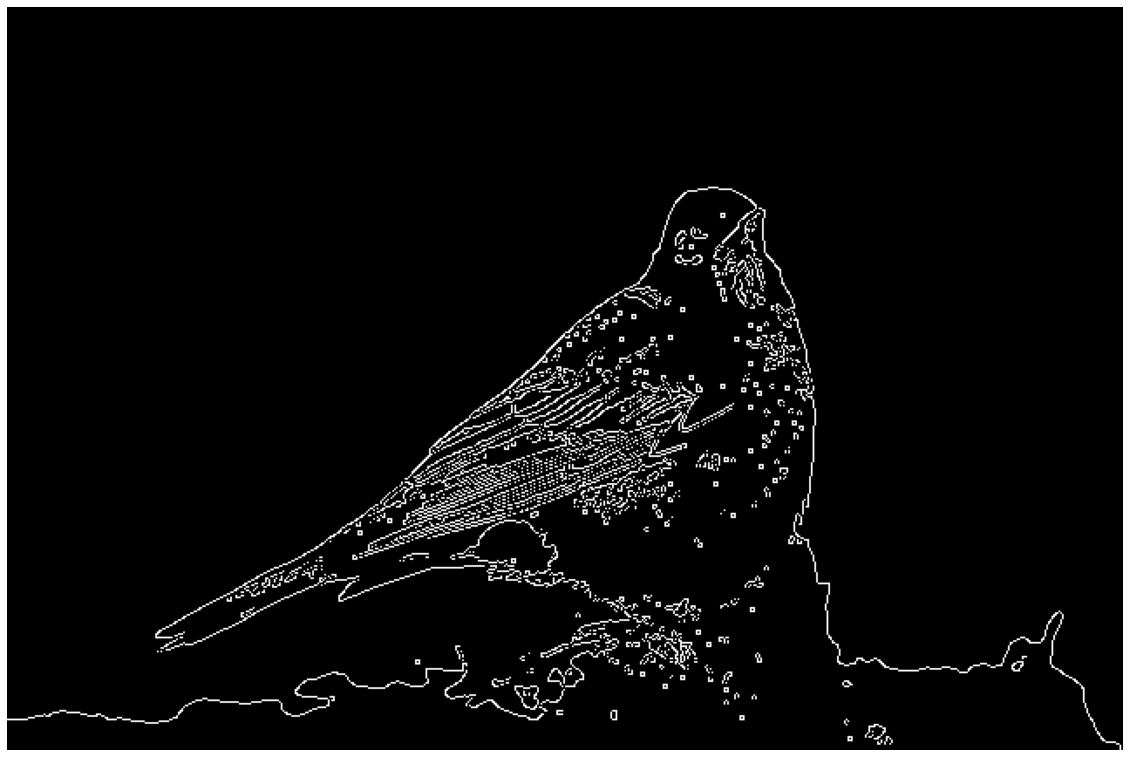

In [3]:
#Apply Canny Edge
edged = cv.Canny(thresh1, 30, 200)
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(edged,cmap='gray')
plt.show()

In [4]:
#Finding contours
#We should use image.copy since findContours alters the image
contours, hierarchy = cv.findContours(edged.copy(),  
    cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE) 

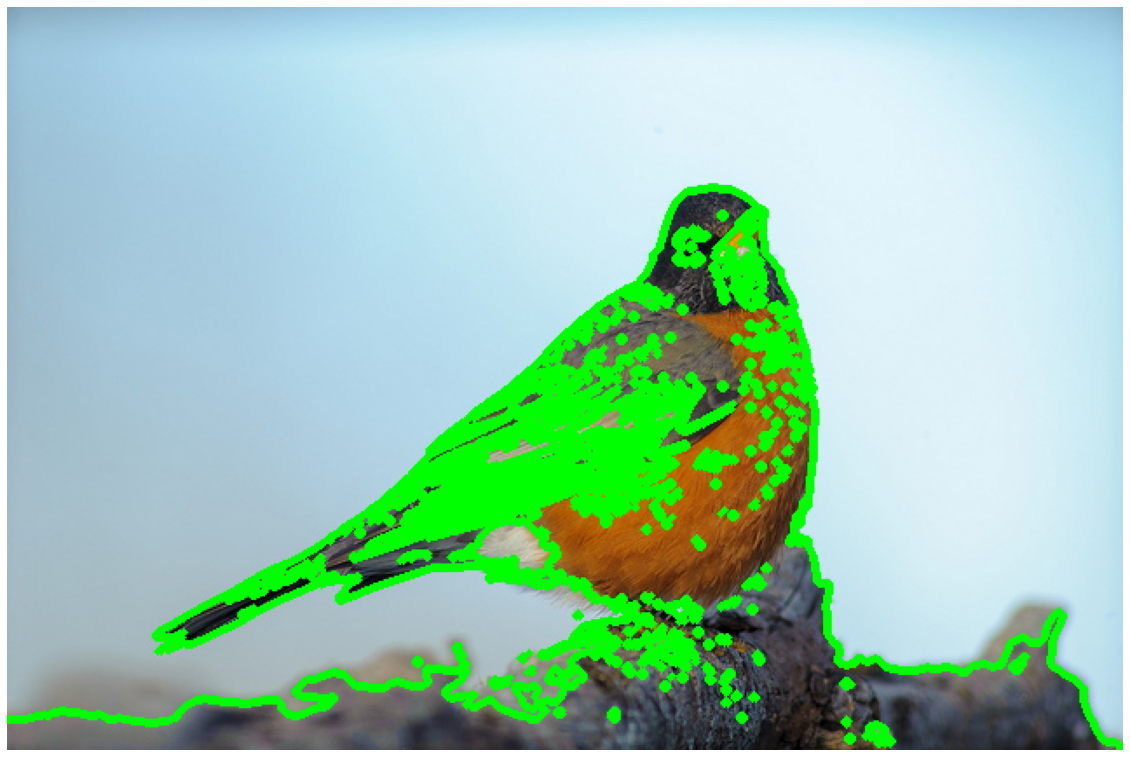

In [5]:
# Draw all contours 
# -1 signifies drawing all contours 
cv.drawContours(rgb, contours, -1, (0, 255, 0), 3)
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(rgb)
plt.show()